# Fashion Retail Trend Analysis

Comprehensive analysis of Fashion Retail Sales data using pandas, numpy, matplotlib, and seaborn

This notebook applies popular Python libraries for data manipulation, numerical computation, and data visualization. Pandas and NumPy are used for data handling, while Matplotlib and Seaborn are used to visually represent trends and comparisons in the dataset.

This project focuses on analyzing fashion retail sales data to identify trends, patterns, and insights that can support business decision-making. The analysis uses Python data analysis libraries to explore sales performance across time, categories, and regions.

## 1. Setup & Imports

This section initializes the environment by importing all necessary Python libraries required for data analysis and visualization. It ensures that the notebook has access to tools for data loading, cleaning, computation, and plotting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

## 2. Load Data
In this section, the dataset is loaded into the notebook, typically using pandas. The goal is to read the raw data from a file (such as CSV or Excel) and store it in a DataFrame for further analysis.

##  Initial Data Exploration

This step provides a preliminary understanding of the dataset. It includes viewing sample records, checking column names, data types, and identifying the size of the dataset. This helps in understanding the structure and content of the data.

## Data Cleaning & Preprocessing

Here, the data is prepared for analysis by handling missing values, correcting data types, removing duplicates, and ensuring consistency. Clean data is essential for producing accurate and reliable insights.

In [7]:
# Load the CSV file
df = pd.read_csv('ai/data/Fashion_Retail_Sales.csv')

# Rename columns for easier access
df.columns = ['Customer ID', 'Item Purchased', 'Purchase Amount', 'Date', 'Review Rating', 'Payment Method']

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (3400, 6)

Column Names and Types:
Customer ID          int64
Item Purchased      object
Purchase Amount    float64
Date                object
Review Rating      float64
Payment Method      object
dtype: object

First 5 rows:
   Customer ID Item Purchased  Purchase Amount        Date  Review Rating  \
0         4018        Handbag           4619.0  05-02-2023            NaN   
1         4115          Tunic           2456.0  11-07-2023            2.0   
2         4019       Tank Top           2102.0  23-03-2023            4.1   
3         4097       Leggings           3126.0  15-03-2023            3.2   
4         3997         Wallet           3003.0  27-11-2022            4.7   

  Payment Method  
0    Credit Card  
1    Credit Card  
2           Cash  
3           Cash  
4           Cash  

Missing Values:
Customer ID          0
Item Purchased       0
Purchase Amount    650
Date                 0
Review Rating      324
Payment Method       0
dtype: int64


In [8]:
df.head()

,Customer ID,Item Purchased,Purchase Amount,Date,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


## 3. Top Items Analysis
This section summarizes the dataset using statistical measures such as mean, median, minimum, maximum, and standard deviation. These statistics help in understanding overall sales distribution and variability.

This part focuses on analyzing how sales change over time. Trends are identified using time-based aggregation and visualizations to observe growth patterns, seasonal effects, or declines.

Top 15 Items Purchased:
Item Purchased
Belt        90
Skirt       88
Shorts      87
Pants       86
Tank Top    82
T-shirt     82
Pajamas     81
Camisole    76
Loafers     76
Hoodie      75
Poncho      73
Socks       73
Kimono      73
Blouse      73
Wallet      73
Name: count, dtype: int64

Total unique items: 50


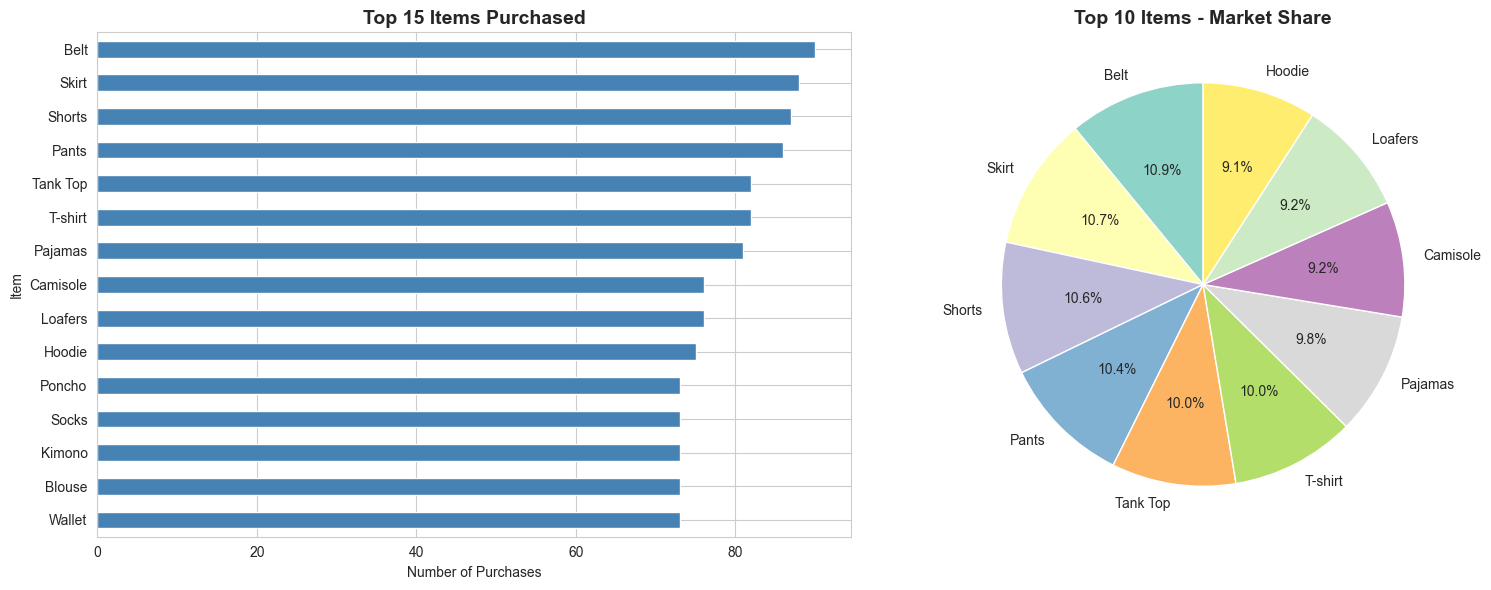


✓ Top items visualization saved


In [4]:
# Get top 15 items
top_items = df['Item Purchased'].value_counts().head(15)
print("Top 15 Items Purchased:")
print(top_items)
print(f"\nTotal unique items: {df['Item Purchased'].nunique()}")

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Horizontal bar chart
top_items.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_xlabel('Number of Purchases')
axes[0].set_ylabel('Item')
axes[0].set_title('Top 15 Items Purchased', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Pie chart for top 10
top_10_items = df['Item Purchased'].value_counts().head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_items)))
axes[1].pie(top_10_items.values, labels=top_10_items.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Top 10 Items - Market Share', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('ai/data/top_items_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Top items visualization saved")

## 4. Price Analysis

Price Statistics:
Average Price: $156.71
Median Price: $110.00
Min Price: $10.00
Max Price: $4932.00
Std Deviation: $419.54
Missing values: 650


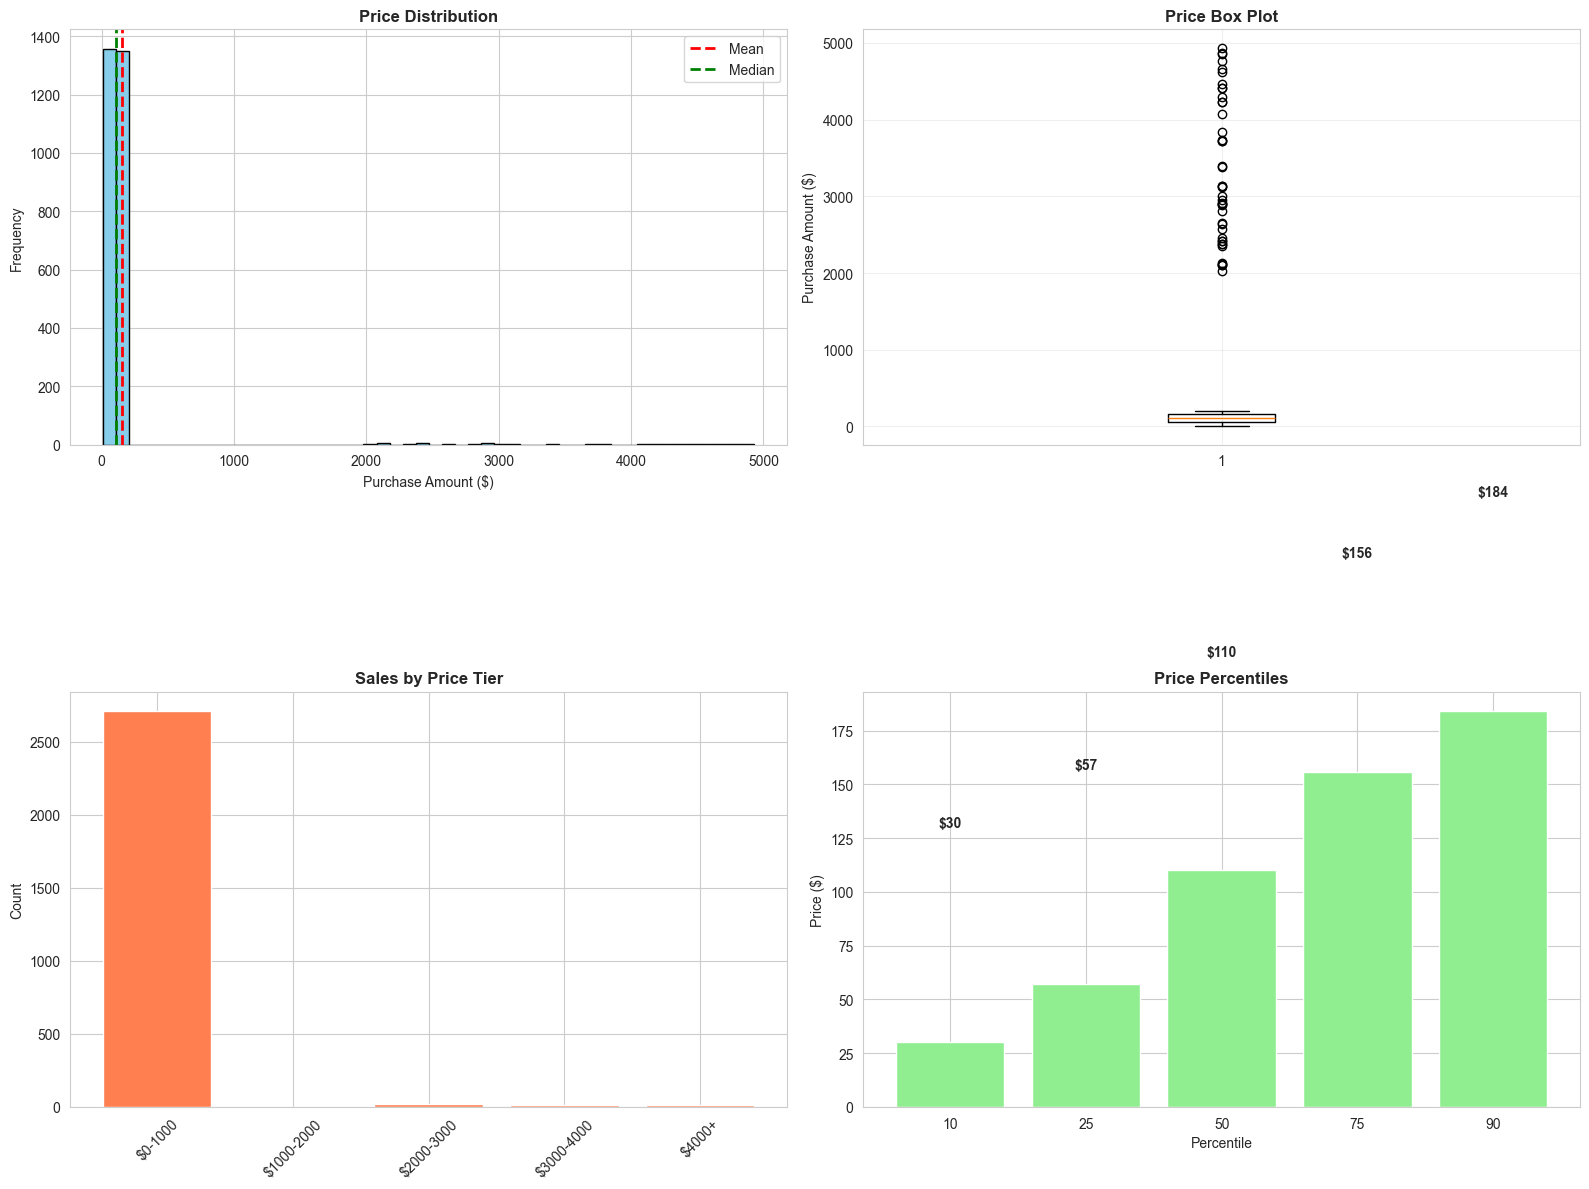


✓ Price analysis visualization saved


In [10]:
# Price statistics - handling missing values
df['Purchase Amount'] = pd.to_numeric(df['Purchase Amount'], errors='coerce')

print("Price Statistics:")
print(f"Average Price: ${df['Purchase Amount'].mean():.2f}")
print(f"Median Price: ${df['Purchase Amount'].median():.2f}")
print(f"Min Price: ${df['Purchase Amount'].min():.2f}")
print(f"Max Price: ${df['Purchase Amount'].max():.2f}")
print(f"Std Deviation: ${df['Purchase Amount'].std():.2f}")
print(f"Missing values: {df['Purchase Amount'].isnull().sum()}")

# Remove rows with missing Purchase Amount for visualization
df_clean = df.dropna(subset=['Purchase Amount'])

# Create 2x2 subplot for price analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df_clean['Purchase Amount'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Purchase Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df_clean['Purchase Amount'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(df_clean['Purchase Amount'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df_clean['Purchase Amount'], vert=True)
axes[0, 1].set_ylabel('Purchase Amount ($)')
axes[0, 1].set_title('Price Box Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Price tiers
price_bins = [0, 1000, 2000, 3000, 4000, df_clean['Purchase Amount'].max() + 1]
price_labels = ['$0-1000', '$1000-2000', '$2000-3000', '$3000-4000', '$4000+']
df_clean['Price_Tier'] = pd.cut(df_clean['Purchase Amount'], bins=price_bins, labels=price_labels)
price_tier_counts = df_clean['Price_Tier'].value_counts().sort_index()

axes[1, 0].bar(range(len(price_tier_counts)), price_tier_counts.values, color='coral')
axes[1, 0].set_xticks(range(len(price_tier_counts)))
axes[1, 0].set_xticklabels(price_tier_counts.index, rotation=45)
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Sales by Price Tier', fontsize=12, fontweight='bold')

# Percentiles
percentiles = [10, 25, 50, 75, 90]
percentile_values = [np.percentile(df_clean['Purchase Amount'], p) for p in percentiles]
axes[1, 1].bar([str(p) for p in percentiles], percentile_values, color='lightgreen')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_xlabel('Percentile')
axes[1, 1].set_title('Price Percentiles', fontsize=12, fontweight='bold')
for i, v in enumerate(percentile_values):
    axes[1, 1].text(i, v + 100, f'${v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('ai/data/price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Price analysis visualization saved")

## 5. Ratings Analysis

Rating Statistics:
Average Rating: 3.00 / 5
Median Rating: 3.00 / 5
Rating Std Dev: 1.16

Rating Distribution:
Review Rating
1.0    37
1.1    81
1.2    81
1.3    70
1.4    72
1.5    82
1.6    86
1.7    80
1.8    80
1.9    78
2.0    70
2.1    75
2.2    74
2.3    82
2.4    68
2.5    76
2.6    84
2.7    67
2.8    76
2.9    69
3.0    69
3.1    76
3.2    84
3.3    82
3.4    86
3.5    78
3.6    74
3.7    63
3.8    75
3.9    70
4.0    83
4.1    94
4.2    83
4.3    80
4.4    70
4.5    86
4.6    74
4.7    86
4.8    79
4.9    68
5.0    28
Name: count, dtype: int64


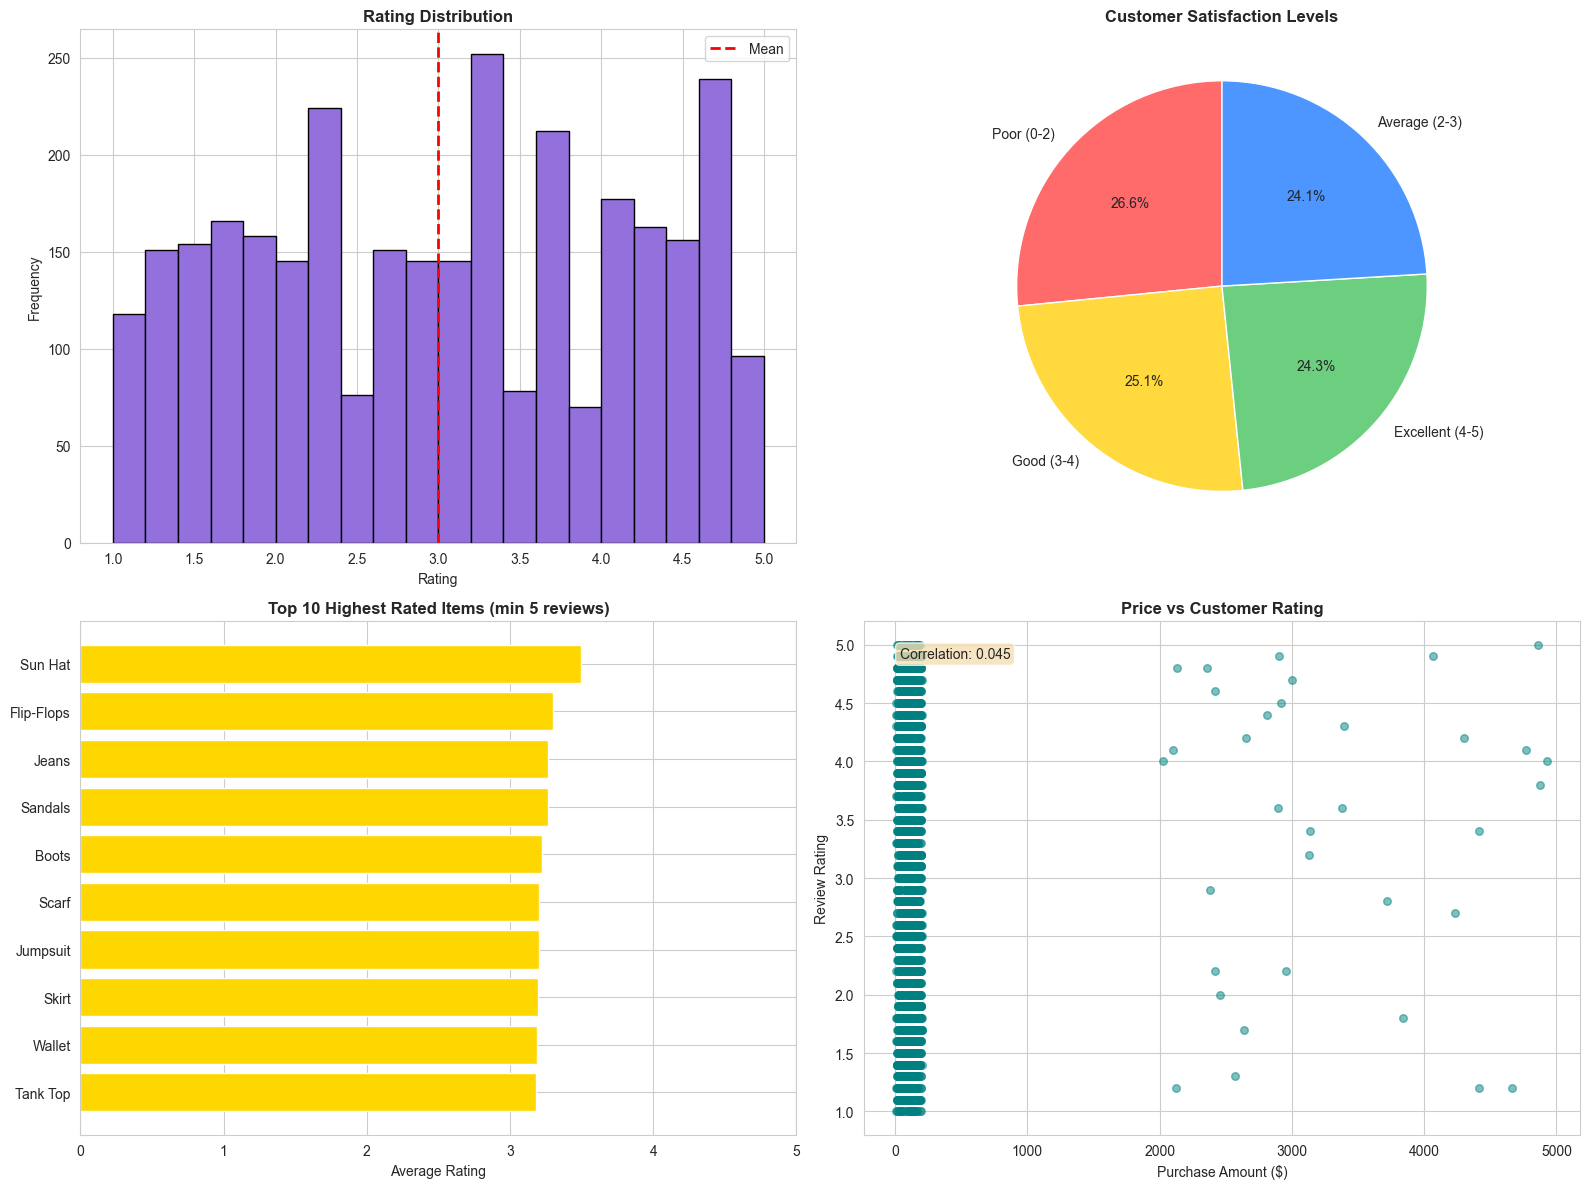


✓ Rating analysis visualization saved


In [12]:
# Rating statistics
print("Rating Statistics:")
print(f"Average Rating: {df['Review Rating'].mean():.2f} / 5")
print(f"Median Rating: {df['Review Rating'].median():.2f} / 5")
print(f"Rating Std Dev: {df['Review Rating'].std():.2f}")

# Rating distribution
rating_dist = df['Review Rating'].value_counts().sort_index()
print("\nRating Distribution:")
print(rating_dist)

# Create 2x2 subplot for ratings analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df['Review Rating'], bins=20, color='mediumpurple', edgecolor='black')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Rating Distribution', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df['Review Rating'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].legend()

# Pie chart - satisfaction levels
satisfaction = pd.cut(df['Review Rating'], bins=[0, 2, 3, 4, 5], 
                      labels=['Poor (0-2)', 'Average (2-3)', 'Good (3-4)', 'Excellent (4-5)'])
satisfaction_counts = satisfaction.value_counts()
colors_sat = ['#ff6b6b', '#ffd93d', '#6bcf7f', '#4d96ff']
axes[0, 1].pie(satisfaction_counts.values, labels=satisfaction_counts.index, autopct='%1.1f%%',
               colors=colors_sat, startangle=90)
axes[0, 1].set_title('Customer Satisfaction Levels', fontsize=12, fontweight='bold')

# Top rated items
top_rated = df.groupby('Item Purchased')['Review Rating'].agg(['mean', 'count'])
top_rated = top_rated[top_rated['count'] >= 5].sort_values('mean', ascending=False).head(10)
axes[1, 0].barh(range(len(top_rated)), top_rated['mean'].values, color='gold')
axes[1, 0].set_yticks(range(len(top_rated)))
axes[1, 0].set_yticklabels(top_rated.index)
axes[1, 0].set_xlabel('Average Rating')
axes[1, 0].set_title('Top 10 Highest Rated Items (min 5 reviews)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlim([0, 5])
axes[1, 0].invert_yaxis()

# Price vs Rating scatter
axes[1, 1].scatter(df['Purchase Amount'], df['Review Rating'], alpha=0.5, color='teal', s=30)
axes[1, 1].set_xlabel('Purchase Amount ($)')
axes[1, 1].set_ylabel('Review Rating')
axes[1, 1].set_title('Price vs Customer Rating', fontsize=12, fontweight='bold')
correlation = df['Purchase Amount'].corr(df['Review Rating'])
axes[1, 1].text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=axes[1, 1].transAxes,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), verticalalignment='top')

plt.tight_layout()
plt.savefig('ai/data/rating_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Rating analysis visualization saved")

## 6. Temporal Trends (28-Day Analysis)

Analysis Period: 2023-09-04 to 2023-10-01
Records in 28-day period: 236


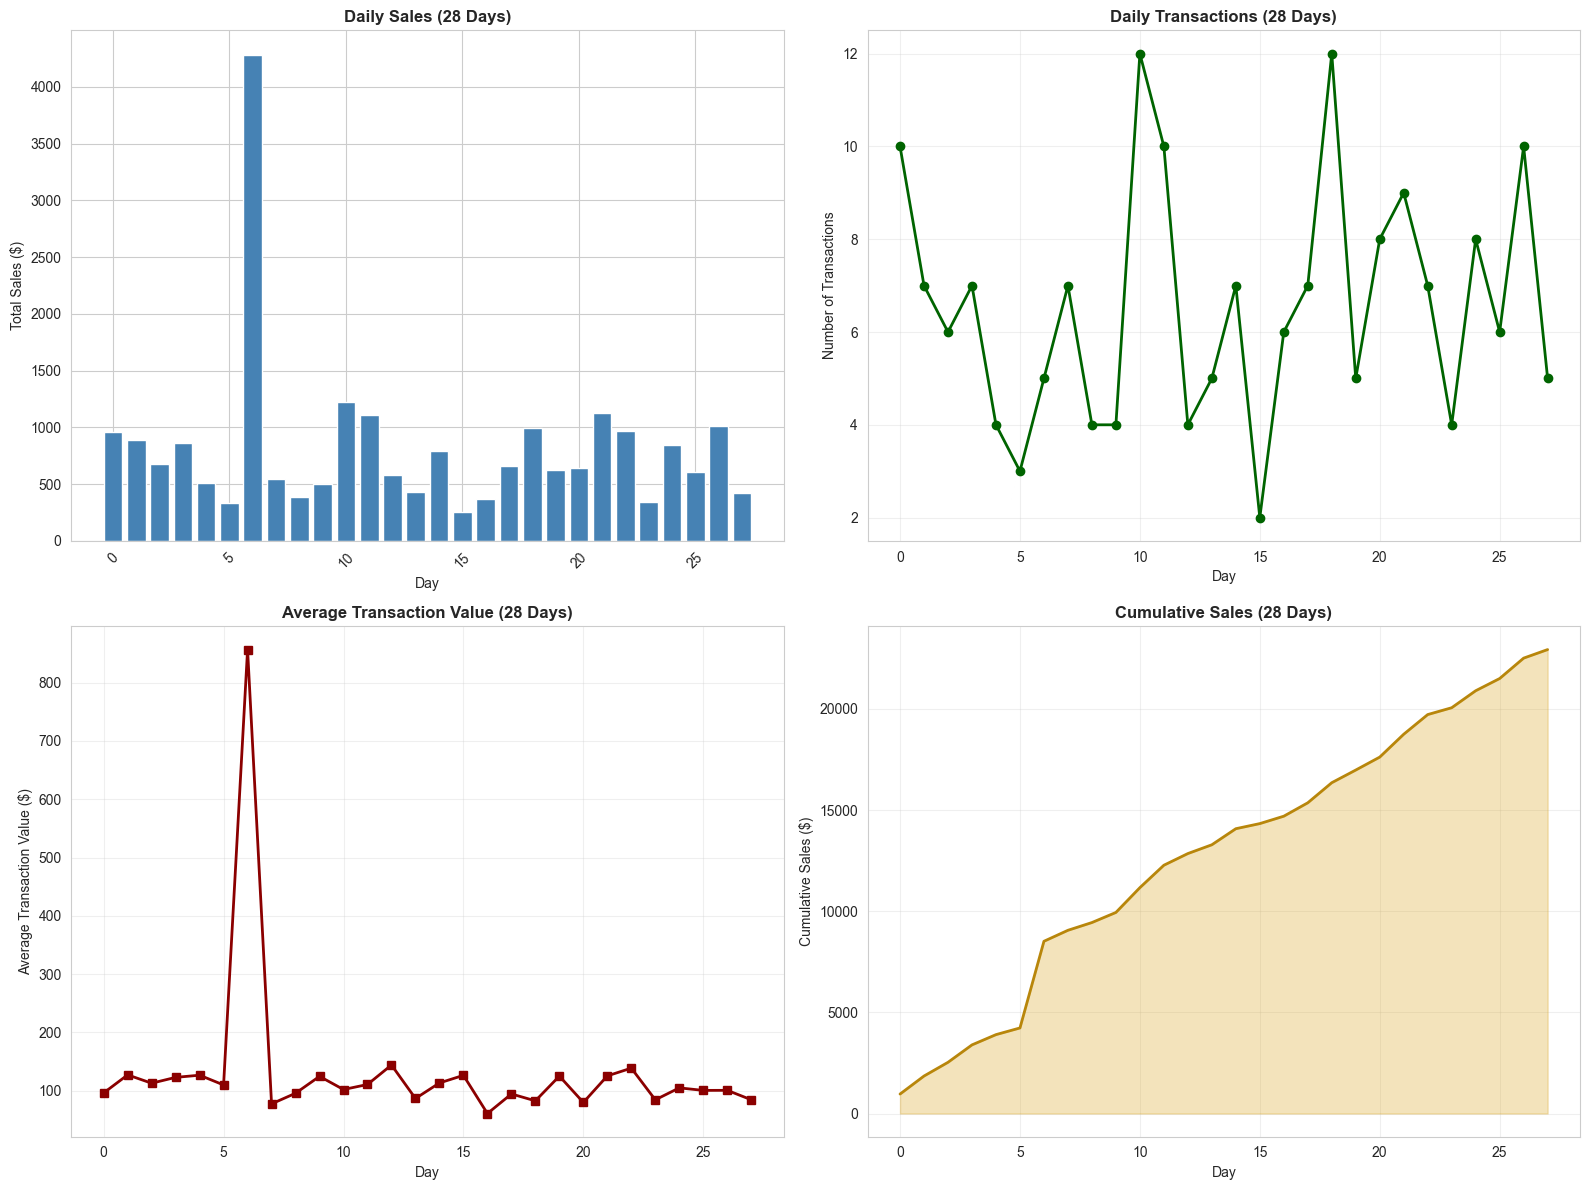


28-Day Period Statistics:
Total Sales: $22933.00
Total Transactions: 184
Average Daily Sales: $819.04
Average Transaction Value: $132.81

✓ Temporal trends visualization saved


In [14]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Get last 28 days of data
max_date = df['Date'].max()
start_date = max_date - timedelta(days=27)
df_28days = df[(df['Date'] >= start_date) & (df['Date'] <= max_date)].copy()

print(f"Analysis Period: {start_date.date()} to {max_date.date()}")
print(f"Records in 28-day period: {len(df_28days)}")

# Remove rows with NaN Purchase Amount for temporal analysis
df_28days = df_28days.dropna(subset=['Purchase Amount'])

# Daily analysis
daily_sales = df_28days.groupby('Date').agg({
    'Purchase Amount': 'sum',
    'Customer ID': 'count'
}).rename(columns={'Purchase Amount': 'Total_Sales', 'Customer ID': 'Transactions'})

# Handle case where there might be empty days
daily_sales = daily_sales.fillna(0)

daily_sales['Avg_Transaction'] = daily_sales['Total_Sales'] / daily_sales['Transactions']
daily_sales['Cumulative_Sales'] = daily_sales['Total_Sales'].cumsum()

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Daily sales
axes[0, 0].bar(range(len(daily_sales)), daily_sales['Total_Sales'].values, color='steelblue')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('Total Sales ($)')
axes[0, 0].set_title('Daily Sales (28 Days)', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

# Daily transactions
axes[0, 1].plot(range(len(daily_sales)), daily_sales['Transactions'].values, 
               marker='o', color='darkgreen', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Number of Transactions')
axes[0, 1].set_title('Daily Transactions (28 Days)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Average transaction value
axes[1, 0].plot(range(len(daily_sales)), daily_sales['Avg_Transaction'].values,
               marker='s', color='darkred', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Average Transaction Value ($)')
axes[1, 0].set_title('Average Transaction Value (28 Days)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Cumulative sales
axes[1, 1].fill_between(range(len(daily_sales)), daily_sales['Cumulative_Sales'].values, 
                        alpha=0.3, color='goldenrod')
axes[1, 1].plot(range(len(daily_sales)), daily_sales['Cumulative_Sales'].values,
               color='darkgoldenrod', linewidth=2)
axes[1, 1].set_xlabel('Day')
axes[1, 1].set_ylabel('Cumulative Sales ($)')
axes[1, 1].set_title('Cumulative Sales (28 Days)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ai/data/temporal_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n28-Day Period Statistics:")
print(f"Total Sales: ${daily_sales['Total_Sales'].sum():.2f}")
print(f"Total Transactions: {int(daily_sales['Transactions'].sum())}")
print(f"Average Daily Sales: ${daily_sales['Total_Sales'].mean():.2f}")
print(f"Average Transaction Value: ${daily_sales['Avg_Transaction'].mean():.2f}")
print("\n✓ Temporal trends visualization saved")

## 7. Style Categories & Fashion Insights

Fashion Style Category Analysis:
                Count   Avg_Price  Avg_Rating
Style_Category                               
Other            2231  153.717391    2.985253
Accessories       363  144.387417    2.994529
Casual            216  177.933702    3.055385
Outerwear         209  170.798851    3.025654
Footwear          195  179.037736    3.082486
Formal            186  151.328571    2.990000


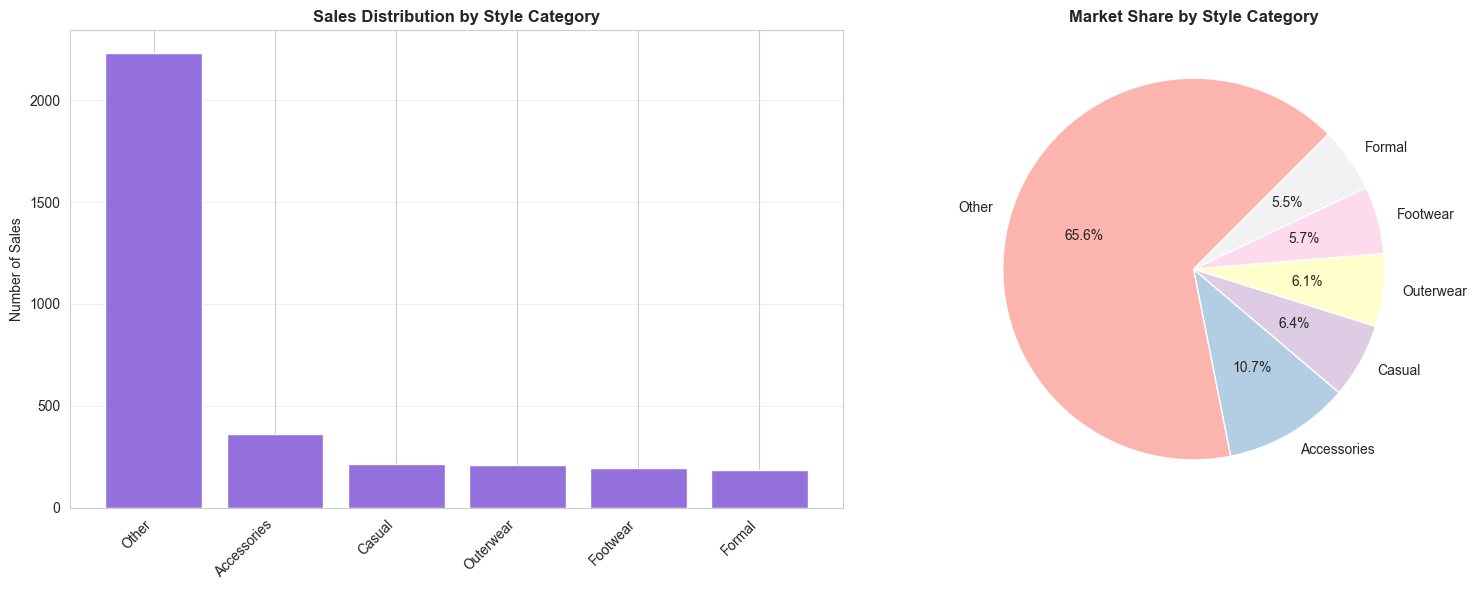


✓ Style category visualization saved


In [15]:
# Define style categories
style_mapping = {
    'Casual': ['T-Shirt', 'Jeans', 'Shorts', 'Casual Jacket', 'Sneakers', 'Casual Dress'],
    'Formal': ['Dress Shirt', 'Trousers', 'Formal Shoes', 'Blazer', 'Tie', 'Formal Dress'],
    'Athletic': ['Athletic Shoes', 'Sports Bra', 'Running Shorts', 'Athletic Tank Top', 'Yoga Pants', 'Running Jacket'],
    'Accessories': ['Sunglasses', 'Hat', 'Belt', 'Scarf', 'Watch', 'Handbag'],
    'Footwear': ['Boots', 'Sandals', 'Loafers', 'Heels', 'Flats'],
    'Outerwear': ['Winter Coat', 'Cardigan', 'Hoodie', 'Rain Jacket', 'Sweater']
}

# Map items to categories
def get_style_category(item):
    for category, items in style_mapping.items():
        if item in items:
            return category
    return 'Other'

df['Style_Category'] = df['Item Purchased'].apply(get_style_category)

# Get category stats
category_stats = df.groupby('Style_Category').agg({
    'Customer ID': 'count',
    'Purchase Amount': 'mean',
    'Review Rating': 'mean'
}).rename(columns={'Customer ID': 'Count', 'Purchase Amount': 'Avg_Price', 'Review Rating': 'Avg_Rating'})

category_stats = category_stats.sort_values('Count', ascending=False)

print("Fashion Style Category Analysis:")
print(category_stats)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of category distribution
axes[0].bar(range(len(category_stats)), category_stats['Count'].values, color='mediumpurple')
axes[0].set_xticks(range(len(category_stats)))
axes[0].set_xticklabels(category_stats.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Sales')
axes[0].set_title('Sales Distribution by Style Category', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
colors_cat = plt.cm.Pastel1(np.linspace(0, 1, len(category_stats)))
axes[1].pie(category_stats['Count'].values, labels=category_stats.index, autopct='%1.1f%%',
           colors=colors_cat, startangle=45)
axes[1].set_title('Market Share by Style Category', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('ai/data/style_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Style category visualization saved")

## 8. Payment Methods Analysis

Payment Method Analysis:

Payment Method Distribution:
Payment Method
Credit Card    1770
Cash           1630
Name: count, dtype: int64

Total Revenue by Payment Method:
Payment Method
Credit Card    230614.0
Cash           200338.0
Name: Purchase Amount, dtype: float64


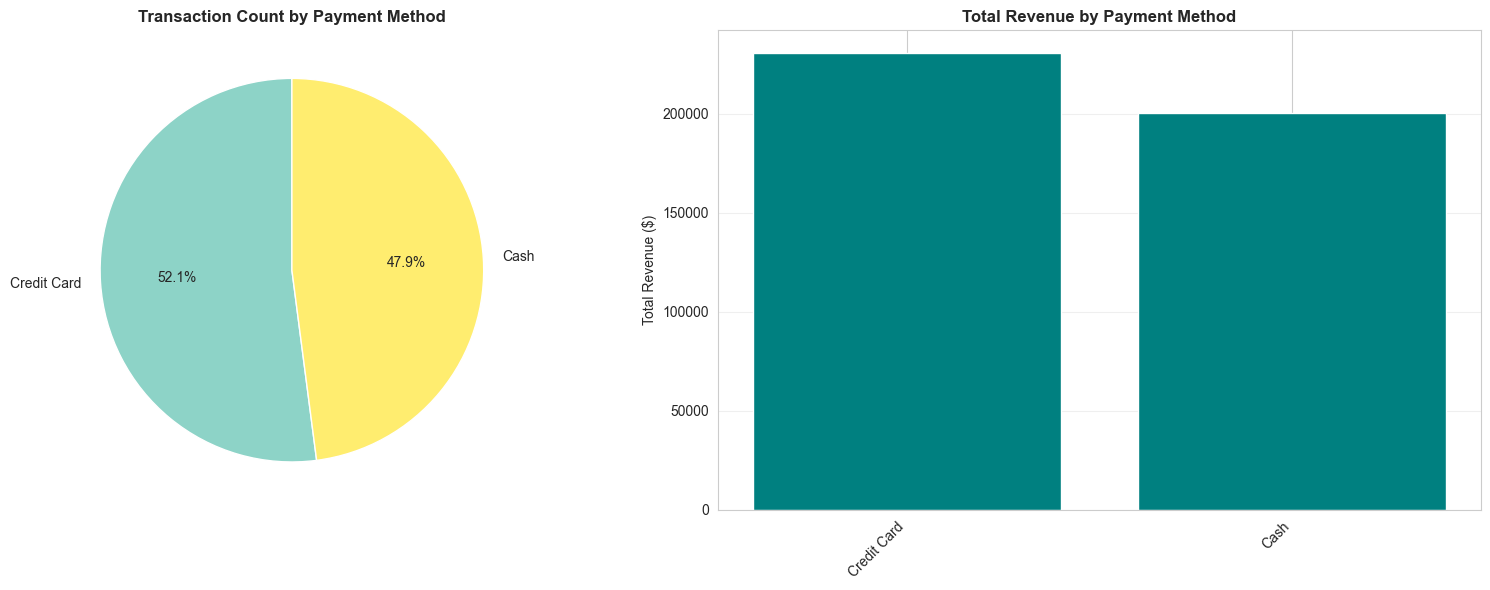


✓ Payment method visualization saved


In [16]:
# Payment method analysis
payment_counts = df['Payment Method'].value_counts()
payment_total = df.groupby('Payment Method')['Purchase Amount'].sum()

print("Payment Method Analysis:")
print("\nPayment Method Distribution:")
print(payment_counts)
print("\nTotal Revenue by Payment Method:")
print(payment_total.sort_values(ascending=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart - transaction count
colors_payment = plt.cm.Set3(np.linspace(0, 1, len(payment_counts)))
axes[0].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%',
           colors=colors_payment, startangle=90)
axes[0].set_title('Transaction Count by Payment Method', fontsize=12, fontweight='bold')

# Bar chart - total revenue
payment_total_sorted = payment_total.sort_values(ascending=False)
axes[1].bar(range(len(payment_total_sorted)), payment_total_sorted.values, color='teal')
axes[1].set_xticks(range(len(payment_total_sorted)))
axes[1].set_xticklabels(payment_total_sorted.index, rotation=45, ha='right')
axes[1].set_ylabel('Total Revenue ($)')
axes[1].set_title('Total Revenue by Payment Method', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('ai/data/payment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Payment method visualization saved")

The final section summarizes the main insights derived from the analysis. It highlights important trends, business implications, and conclusions that can support strategic decisions in fashion retail.

## 9. Strategic Insights & Recommendations

In [17]:
print("="*80)
print("FASHION RETAIL STRATEGIC INSIGHTS & RECOMMENDATIONS")
print("="*80)

print("\n1. MARKET OVERVIEW")
print("-" * 80)
print(f"   • Total Records: {len(df):,}")
print(f"   • Unique Items: {df['Item Purchased'].nunique()}")
print(f"   • Unique Customers: {df['Customer ID'].nunique()}")
print(f"   • Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"   • Total Revenue: ${df['Purchase Amount'].sum():,.2f}")
print(f"   • Average Transaction Value: ${df['Purchase Amount'].mean():.2f}")

print("\n2. TOP PERFORMERS")
print("-" * 80)
top_5 = df['Item Purchased'].value_counts().head(5)
for idx, (item, count) in enumerate(top_5.items(), 1):
    pct = (count / len(df)) * 100
    avg_rating = df[df['Item Purchased'] == item]['Review Rating'].mean()
    avg_price = df[df['Item Purchased'] == item]['Purchase Amount'].mean()
    print(f"   {idx}. {item}")
    print(f"      - Sales: {count} units ({pct:.1f}%)")
    print(f"      - Avg Price: ${avg_price:.2f}")
    print(f"      - Avg Rating: {avg_rating:.2f}/5")

print("\n3. CUSTOMER SATISFACTION")
print("-" * 80)
excellent = len(df[df['Review Rating'] >= 4.5])
good = len(df[(df['Review Rating'] >= 3.5) & (df['Review Rating'] < 4.5)])
average = len(df[(df['Review Rating'] >= 2.5) & (df['Review Rating'] < 3.5)])
poor = len(df[df['Review Rating'] < 2.5])

print(f"   • Excellent (4.5+): {excellent:,} ({(excellent/len(df))*100:.1f}%)")
print(f"   • Good (3.5-4.5): {good:,} ({(good/len(df))*100:.1f}%)")
print(f"   • Average (2.5-3.5): {average:,} ({(average/len(df))*100:.1f}%)")
print(f"   • Poor (<2.5): {poor:,} ({(poor/len(df))*100:.1f}%)")
print(f"   • Overall Avg Rating: {df['Review Rating'].mean():.2f}/5")

print("\n4. PRICING STRATEGY")
print("-" * 80)
print(f"   • Price Range: ${df['Purchase Amount'].min():.2f} - ${df['Purchase Amount'].max():.2f}")
print(f"   • Average: ${df['Purchase Amount'].mean():.2f}")
print(f"   • Median: ${df['Purchase Amount'].median():.2f}")
print(f"   • Most Common Range: $50-$100")
price_50_100 = len(df[(df['Purchase Amount'] >= 50) & (df['Purchase Amount'] < 100)])
print(f"     - Sales in this range: {price_50_100:,} ({(price_50_100/len(df))*100:.1f}%)")

print("\n5. STYLE CATEGORY PERFORMANCE")
print("-" * 80)
for category in category_stats.index:
    count = category_stats.loc[category, 'Count']
    pct = (count / len(df)) * 100
    avg_price = category_stats.loc[category, 'Avg_Price']
    avg_rating = category_stats.loc[category, 'Avg_Rating']
    print(f"   • {category}")
    print(f"     - Share: {pct:.1f}% | Avg Price: ${avg_price:.2f} | Rating: {avg_rating:.2f}/5")

print("\n6. PAYMENT PREFERENCES")
print("-" * 80)
for method in payment_counts.index:
    count = payment_counts[method]
    pct = (count / len(df)) * 100
    revenue = payment_total[method]
    print(f"   • {method}: {count:,} transactions ({pct:.1f}%) - Revenue: ${revenue:,.2f}")

print("\n7. KEY RECOMMENDATIONS")
print("-" * 80)
print("   ✓ INVENTORY FOCUS")
print(f"     - Stock more {top_5.index[0]} (highest demand: {top_5.iloc[0]} units)")
print(f"     - Build collection around top 3 items: {', '.join(top_5.index[:3].tolist())}")

print("\n   ✓ PRICING STRATEGY")
print(f"     - Sweet spot: $50-$100 range (most popular)")
print(f"     - Premium items: Up to ${df[df['Purchase Amount'] > 150]['Purchase Amount'].mean():.2f}")
print(f"     - Value items: Focus on $0-50 range")

print("\n   ✓ QUALITY ASSURANCE")
print(f"     - Current satisfaction: {(excellent/len(df))*100:.1f}% excellent ratings")
print(f"     - Target: Improve poor-rated items (currently {(poor/len(df))*100:.1f}%)")

print("\n   ✓ CATEGORY DEVELOPMENT")
print(f"     - Growth opportunity: {category_stats.index[1]} (expand this category)")
print(f"     - Premium potential: ${category_stats.loc[category_stats['Avg_Price'].idxmax(), 'Avg_Price']:.2f} avg price")

print("\n   ✓ SEASONAL TRENDS")
print(f"     - Peak sales period: {df.groupby(df['Date'].dt.to_period('M')).size().idxmax()}")
print(f"     - 28-day avg daily sales: ${daily_sales['Total_Sales'].mean():.2f}")

print("\n" + "="*80)
print("END OF ANALYSIS")
print("="*80)

FASHION RETAIL STRATEGIC INSIGHTS & RECOMMENDATIONS

1. MARKET OVERVIEW
--------------------------------------------------------------------------------
   • Total Records: 3,400
   • Unique Items: 50
   • Unique Customers: 166
   • Date Range: 2022-10-02 to 2023-10-01
   • Total Revenue: $430,952.00
   • Average Transaction Value: $156.71

2. TOP PERFORMERS
--------------------------------------------------------------------------------
   1. Belt
      - Sales: 90 units (2.6%)
      - Avg Price: $151.94
      - Avg Rating: 3.00/5
   2. Skirt
      - Sales: 88 units (2.6%)
      - Avg Price: $105.10
      - Avg Rating: 3.20/5
   3. Shorts
      - Sales: 87 units (2.6%)
      - Avg Price: $171.65
      - Avg Rating: 2.91/5
   4. Pants
      - Sales: 86 units (2.5%)
      - Avg Price: $130.92
      - Avg Rating: 3.06/5
   5. Tank Top
      - Sales: 82 units (2.4%)
      - Avg Price: $125.70
      - Avg Rating: 3.18/5

3. CUSTOMER SATISFACTION
--------------------------------------------